In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
# Supprimer les colonnes "Cabin", "SibSp", "Parch", "Ticket", "Name" et "passengerId" qui ne sont pas significatives
df = df.drop(['Cabin', 'SibSp' ,'Parch', 'Ticket', 'Name', 'PassengerId'], axis=1)

In [5]:
city_map = {'S': 0, 'C': 1, 'Q':2}
df['Embarked'] = df['Embarked'].map(city_map)

array([[<AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Fare'}>],
       [<AxesSubplot: title={'center': 'Embarked'}>, <AxesSubplot: >]],
      dtype=object)

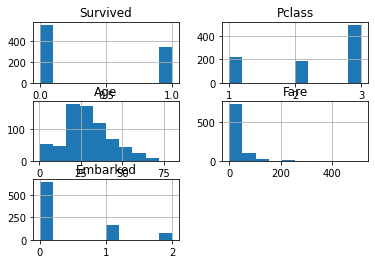

In [6]:
df.hist()

### Grâce à ces graphiques on peut constater l'importance de certaines colonnes de notre tableau qui ont des données bien plus fluctuantes et qui seront donc pertinentes à analyser.
### Nous avons une vue globale du nombre de survivants, des âges des passagers, du nombre de passagers en fonction de leur classe, de leur ville d'embarquement ou du prix du billet.

In [7]:
pd.set_option("display.max_rows", None)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.00,7.2500,0.0
1,1,1,female,38.00,71.2833,1.0
2,1,3,female,26.00,7.9250,0.0
3,1,1,female,35.00,53.1000,0.0
4,0,3,male,35.00,8.0500,0.0
5,0,3,male,NaN,8.4583,2.0
6,0,1,male,54.00,51.8625,0.0
7,0,3,male,2.00,21.0750,0.0
8,1,3,female,27.00,11.1333,0.0
9,1,2,female,14.00,30.0708,1.0


In [8]:
gender_map = {'male': 0, 'female': 1}

In [9]:
df['Sex'] = df['Sex'].map(gender_map)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.00,7.2500,0.0
1,1,1,1,38.00,71.2833,1.0
2,1,3,1,26.00,7.9250,0.0
3,1,1,1,35.00,53.1000,0.0
4,0,3,0,35.00,8.0500,0.0
5,0,3,0,NaN,8.4583,2.0
6,0,1,0,54.00,51.8625,0.0
7,0,3,0,2.00,21.0750,0.0
8,1,3,1,27.00,11.1333,0.0
9,1,2,1,14.00,30.0708,1.0


In [10]:
# calculer la moyenne des prix par classe
average = df.groupby('Pclass')['Fare'].mean()

In [11]:
average

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [12]:
nb_towns = df["Embarked"].nunique()
nb_towns

3

In [13]:
towns_embarked_count = df["Embarked"].value_counts()
print(towns_embarked_count)

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64


In [14]:
# Remplaçement des valeurs NaN de la colonne Sex en fonction de la classe, du sexe, et de la ville d'embarcation
age_means = df.groupby(['Sex', 'Pclass', 'Embarked'])['Age'].mean()
df['Age'] = df.apply(lambda row: age_means[row['Sex'], row['Pclass'], row['Embarked']] if pd.isnull(row['Age']) else row['Age'], axis=1)
df['Age'] = df['Age'].apply(lambda x: round(x, 1))

df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0.0
1,1,1,1,38.0,71.2833,1.0
2,1,3,1,26.0,7.9250,0.0
3,1,1,1,35.0,53.1000,0.0
4,0,3,0,35.0,8.0500,0.0
5,0,3,0,28.1,8.4583,2.0
6,0,1,0,54.0,51.8625,0.0
7,0,3,0,2.0,21.0750,0.0
8,1,3,1,27.0,11.1333,0.0
9,1,2,1,14.0,30.0708,1.0


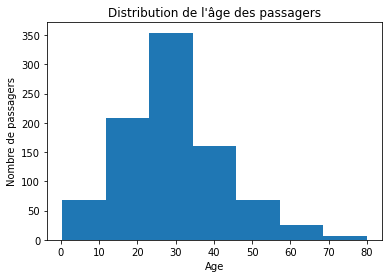

In [15]:
plt.hist(df['Age'], bins=7)
plt.xlabel('Age')
plt.ylabel('Nombre de passagers')
plt.title("Distribution de l'âge des passagers")
plt.show()

### Ce graphique nous indique la quantité de passagers classés par leur tranche d'âge. On peut constater qu'une majorité des passagers ont entre 25 et 35 ans. A contrario, les passager entre 55 et 80 ans sont peut nombreux.

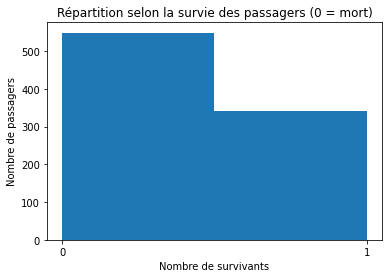

In [16]:
plt.hist(df['Survived'].apply(str), bins=2)
plt.xlabel('Nombre de survivants')
plt.ylabel('Nombre de passagers')
plt.title("Répartition selon la survie des passagers (0 = mort)")
plt.show()

### On constate grâce à ce graphique que le nombre de morts est plus important que le nombre de survivants (presque 2/3 de décés).

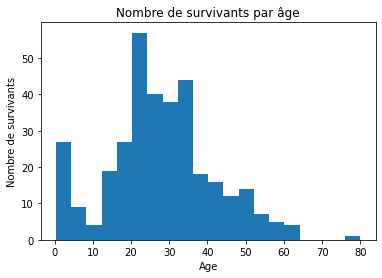

In [17]:
fig, ax = plt.subplots()

# Filtrer les passagers survivants
survivors = df[df['Survived'] == 1]

# Tracer l'histogramme des âges des survivants
ax.hist(survivors['Age'], bins=20)

# Ajouter des étiquettes d'axe et un titre
ax.set_xlabel("Age")
ax.set_ylabel("Nombre de survivants")
ax.set_title("Nombre de survivants par âge")

# Afficher le graphe
plt.show()

### Ce graphique nous indique le nombre global de survivants en fonction de leur âge. Les enfants en bas âge et les jeunes adulte (entre 20 et 35) sont les tranches d'âges avec le plus de taux de survie.

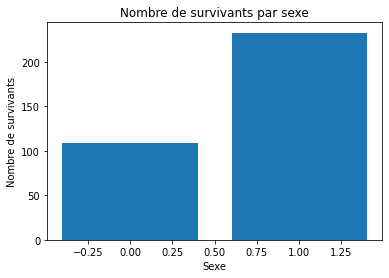

In [18]:
# Créer un nouveau DataFrame contenant uniquement les survivants
survivors = df[df['Survived'] == 1]

# Calculer le nombre de survivants par sexe
survivors_by_sex = survivors.groupby('Sex').size()
# Créer le graphique
plt.bar(survivors_by_sex.index, survivors_by_sex.values)
plt.title('Nombre de survivants par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de survivants')
plt.show()

### Grâce à ce graphique nous constatons que plus de femmes on survécu à la chute du Titanic et moitié moins d'hommes ont survécu à ce drame 

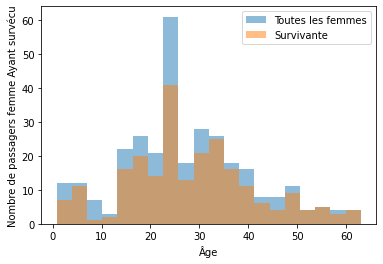

In [19]:
# Filtrage des données pour n'inclure que les femmes
female_df = df.loc[df['Sex'] == 1]

# Création d'un graphique de comptage des survivants en fonction de l'âge
plt.hist(female_df['Age'], bins=20, alpha=0.5, label='Toutes les femmes')
plt.hist(female_df[female_df['Survived'] == 1]['Age'], bins=20, alpha=0.5 , label='Survivante')

plt.legend(loc='upper right')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers femme Ayant survécu')
plt.show()

### Avec ce graphique on peut voir en 'orange' le nombre de femme ayant survécu en fonction de leur âge par rapport au nombre total de femmes. On peut donc contater que l'on a un pic de survivantes dans les femmes ayant entre 22 et 28 ans (qui correspond également à la tranche d'âge majoritaire pour la totalité des femmes). On se rend également compte que le pourcentage de femme ayant survécu est pluôt très élévé par rapport au nombre de femme total.

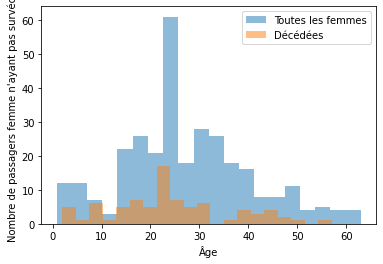

In [20]:
# Filtrage des données pour n'inclure que les femmes
female_df = df.loc[df['Sex'] == 1]

# Création d'un graphique de comptage des survivants en fonction de l'âge
plt.hist(female_df['Age'], bins=20, alpha=0.5, label = "Toutes les femmes")
plt.hist(female_df[female_df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Décédées')

plt.legend(loc='upper right')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers femme n\'ayant pas survécu')
plt.show()

### Avec ce graphique on peut voir en 'orange' le nombre de femme décédées en fonction de leur âge par rapport au nombre total de femmes (en bleu), On se rend compte que le pourcentage de femmes décédées est faible par rapport au total des femmes.

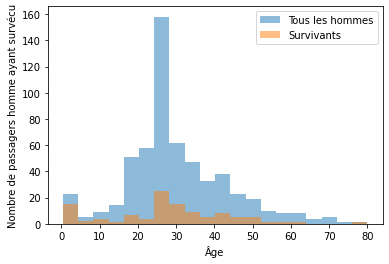

In [21]:
# Filtrage des données pour n'inclure que les hommes
homme_df = df[df['Sex'] == 0]

# Création d'un graphique de comptage des survivants en fonction de l'âge
plt.hist(homme_df['Age'], bins=20, alpha=0.5, label='Tous les hommes')
plt.hist(homme_df.loc[homme_df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survivants')

plt.legend(loc='upper right')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers homme ayant survécu')
plt.show()

### On peut constater ici que par rapport au nombre total d'homme sur le bateau, le pourcentage des hommes ayant survécu très faible

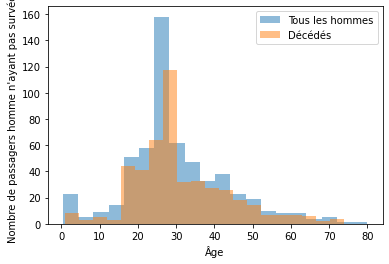

In [22]:
# Filtrage des données pour n'inclure que les hommes
homme_df = df[df['Sex'] == 0]

# Création d'un graphique de comptage des survivants en fonction de l'âgeAge
plt.hist(homme_df['Age'], bins=20, alpha=0.5, label='Tous les hommes')
plt.hist(homme_df.loc[homme_df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Décédés')

plt.legend(loc='upper right')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers homme n\'ayant pas survécu')
plt.show()

### On peut constater ici que par rapport au nombre total d'homme sur le bateau, le pourcentage des hommes décédés est très élevé

In [23]:
cut_variable = df[["Survived", "Age", "Embarked", "Sex", "Pclass", "Fare"]]
df_dummies = pd.get_dummies(cut_variable)
df_dummies

,Survived,Age,Embarked,Sex,Pclass,Fare
0,0,22.0,0.0,0,3,7.2500
1,1,38.0,1.0,1,1,71.2833
2,1,26.0,0.0,1,3,7.9250
3,1,35.0,0.0,1,1,53.1000
4,0,35.0,0.0,0,3,8.0500
5,0,28.1,2.0,0,3,8.4583
6,0,54.0,0.0,0,1,51.8625
7,0,2.0,0.0,0,3,21.0750
8,1,27.0,0.0,1,3,11.1333
9,1,14.0,1.0,1,2,30.0708


# Carte thermique

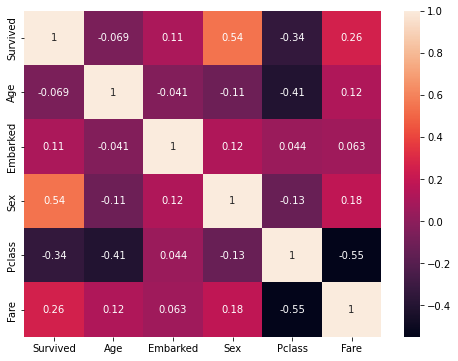

In [24]:
correlation = df_dummies.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.show()

### * Nous trouvons une correlation représentative entre le nombre de survivants et le genre (0.54). Ainsi, comme nous l'avons démontré dans les graphiques précédents, il s'agit du critère principal déterminant la survie d'un passager (rappellons nous : "Les femmes et les enfants d'abord !").

### * Nous pouvons également observer une correlation entre l'âge et la classe du billet (-0,41), et ainsi un lien indirect entre l'âge, la classe et la survie.

### * Le prix du billet peut êgalement être lié à la classe (-0.55) et être un critère permettant de définir les chances de survie.

### * Enfin, nous pouvons constater que le lieu d'embarquement joue également un rôle dans le taux de survie. Ainsi, passager ayant embarqué à Queenstown (dernière escale) on eu un taux de mortalité plus élevé que ceux qui ont embarqué à Cherbourg ou Southampton. En faisant un lien avec le prix du billet, nous pouvons en déduire que les passagers ayant embarqué à Queenstown étaient majoritairement en classe 2 ou 3.


In [25]:
X = df[['Age', 'Embarked', 'Sex', 'Pclass', 'Fare']]
y = df[['Survived']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
model = XGBClassifier(eval_metric='mlogloss')

In [28]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [29]:
y_pred = model.p(X_test)

AttributeError: 'XGBClassifier' object has no attribute 'p'

In [ ]:
model.predict_proba(X_test)

In [ ]:
y_pred

In [ ]:
model.save_model("modelTitanic.json")